import library

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

load data

In [4]:
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',')
gdp_per_cpaita = pd.read_csv('gdp_per_capita.csv', thousands=',', delimiter = '\t', encoding='latin1', na_values="n/a")

join two DataFrame

In [5]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [6]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_cpaita)

In [7]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

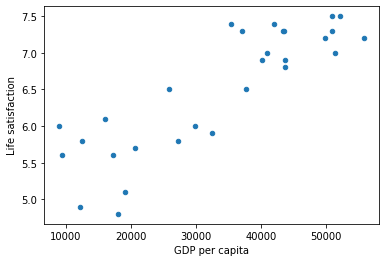

In [8]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [9]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
model.coef_

array([[4.91154459e-05]])

In [19]:
x_model = range(0,11000,1000)
y_model = []
for num in x_model:
    y_model.append(model.predict([[num]])[0][0])

In [20]:
y_model

[4.853052800266436,
 4.902168246158021,
 4.951283692049606,
 5.000399137941191,
 5.049514583832775,
 5.098630029724361,
 5.147745475615945,
 5.19686092150753,
 5.245976367399114,
 5.2950918132907,
 5.3442072591822845]

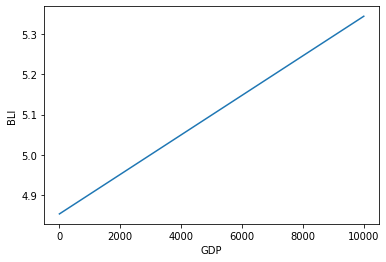

In [27]:
plt.xlabel('GDP')
plt.ylabel('BLI')
plt.plot(x_model, y_model)
plt.show()